# Feed Forward Classification Model Comparison

Comparing standard feed forward neural network with Adam-optimized version for classification.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load and prepare data
data = pd.read_csv('new_model.csv')

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
def create_model(optimizer):
    """Create a feed forward neural network with specified optimizer"""
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [9]:
# Train standard SGD model
sgd_model = create_model('sgd')
sgd_history = sgd_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

/workspaces/CKD_Diagnosis/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-28 07:35:52.063297: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5171 - loss: 0.6448 - val_accuracy: 0.6429 - val_loss: 0.6330
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5861 - loss: 0.6023 - val_accuracy: 0.6964 - val_loss: 0.6123
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7281 - loss: 0.5763 - val_accuracy: 0.7500 - val_loss: 0.5926
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7430 - loss: 0.5669 - val_accuracy: 0.7857 - val_loss: 0.5739
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.5700 - val_accuracy: 0.8214 - val_loss: 0.5559
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8594 - loss: 0.5316 - val_accuracy: 0.8214 - val_loss: 0.5386
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8575 - loss: 0.5282 - val_accuracy: 0.8571 - val_loss: 0.5218
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8847 - loss: 0.4928 - val_accuracy: 0.8571 - val_loss: 0.505

In [10]:
# Train Adam model
adam_model = create_model('adam')
adam_history = adam_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6308 - loss: 0.6184 - val_accuracy: 0.7679 - val_loss: 0.5596
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8885 - loss: 0.5077 - val_accuracy: 1.0000 - val_loss: 0.4720
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9704 - loss: 0.4084 - val_accuracy: 0.9821 - val_loss: 0.3985
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9680 - loss: 0.3600 - val_accuracy: 0.9821 - val_loss: 0.3346
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9700 - loss: 0.2691 - val_accuracy: 0.9643 - val_loss: 0.2803
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9575 - loss: 0.2363 - val_accuracy: 0.9643 - val_loss: 0.2340
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9615 - loss: 0.1999 - val_accuracy: 0.9643 - val_loss: 0.1970
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9694 - loss: 0.1489 - val_accuracy: 0.9643 - val_loss: 0.16

In [11]:
def evaluate_model(model, model_name):
    """Evaluate model performance and print metrics"""
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    y_pred_prob = model.predict(X_test_scaled)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Evaluate both models
evaluate_model(sgd_model, "Standard SGD Model")
evaluate_model(adam_model, "Adam Model")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Standard SGD Model Performance Metrics:
Accuracy: 0.9917
Precision: 1.0000
Recall: 0.9868
F1 Score: 0.9934
ROC AUC: 0.9997
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Adam Model Performance Metrics:
Accuracy: 0.9917
Precision: 1.0000
Recall: 0.9868
F1 Score: 0.9934
ROC AUC: 0.9997


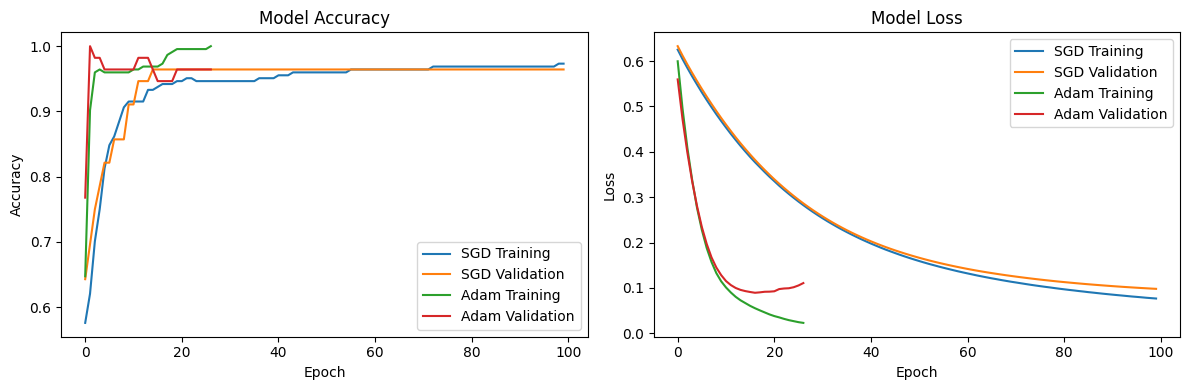

In [12]:
# Plot learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(sgd_history.history['accuracy'], label='SGD Training')
plt.plot(sgd_history.history['val_accuracy'], label='SGD Validation')
plt.plot(adam_history.history['accuracy'], label='Adam Training')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(sgd_history.history['loss'], label='SGD Training')
plt.plot(sgd_history.history['val_loss'], label='SGD Validation')
plt.plot(adam_history.history['loss'], label='Adam Training')
plt.plot(adam_history.history['val_loss'], label='Adam Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()